In [25]:
from numpy import NaN
import pandas as pd

# Import the data as a pandas dataframe
progress = pd.read_csv("/content/Vaccine_Progress_Dashboard_Data.csv")

progress.info()
progress['administered_date']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36580 entries, 0 to 36579
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   county                          36580 non-null  object
 1   administered_date               36580 non-null  object
 2   total_doses                     36580 non-null  int64 
 3   cumulative_total_doses          36580 non-null  int64 
 4   pfizer_doses                    36580 non-null  int64 
 5   cumulative_pfizer_doses         36580 non-null  int64 
 6   moderna_doses                   36580 non-null  int64 
 7   cumulative_moderna_doses        36580 non-null  int64 
 8   jj_doses                        36580 non-null  int64 
 9   cumulative_jj_doses             36580 non-null  int64 
 10  partially_vaccinated            36580 non-null  int64 
 11  total_partially_vaccinated      36580 non-null  int64 
 12  fully_vaccinated                36580 non-null

0        2020-01-05
1        2020-03-03
2        2020-07-27
3        2020-07-29
4        2020-07-30
            ...    
36575    2022-03-02
36576    2022-03-03
36577    2022-03-04
36578    2022-03-05
36579    2022-03-06
Name: administered_date, Length: 36580, dtype: object

In [26]:
# need to fill with california flag for the null values
progress[progress['california_flag'].isnull()]

,county,administered_date,total_doses,cumulative_total_doses,pfizer_doses,cumulative_pfizer_doses,moderna_doses,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,california_flag,booster_recip_count,cumulative_booster_recip_count
0,Alameda,2020-01-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0
1,Alameda,2020-03-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0
2,Alameda,2020-07-27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0
3,Alameda,2020-07-29,0,1,0,0,0,1,0,0,0,0,0,0,0,1,NaN,0,0
4,Alameda,2020-07-30,0,1,0,0,0,1,0,0,0,0,0,0,0,1,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8866,Yuba,2020-12-11,0,2,0,0,0,2,0,0,0,0,0,1,0,1,NaN,0,0
8867,Yuba,2020-12-12,0,2,0,0,0,2,0,0,0,0,0,1,0,1,NaN,0,0
8868,Yuba,2020-12-13,0,2,0,0,0,2,0,0,0,0,0,1,0,1,NaN,0,0
8869,Yuba,2020-12-14,0,2,0,0,0,2,0,0,0,0,0,1,0,1,NaN,0,0


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np



# function for building the decision tree
# Return: trained decision tree
def decision_tree_build(train_data, label_data, criterion, min_samples_split, max_depth):
  print("BUILDING DECISION TREE ... ")
  print("Training Data Shape: " + str(train_data.shape))
  dt_clf = DecisionTreeClassifier(criterion = criterion,
                                  min_samples_split = min_samples_split,
                                  max_depth = max_depth)
  dt_clf.fit(train_data, label_data)
  return dt_clf

# function for building the random forest
# Return: trained random forest classifier
def random_forest_build(train_data, label_data, criterion, n_estimators):
  print("BUILDING RANDOM FOREST ... ")
  print("Training Data Shape: " + str(train_data.shape))
  rf_clf = RandomForestClassifier(n_estimators = n_estimators,
                                  criterion = criterion)
  rf_clf.fit(train_data, label_data)
  return rf_clf

# prediction function for the given data and classifier
# Return: output of the prediction
def classifier_prediction(data, trained_classifier):
  print("Feeded Data Shape: " + str(data.shape))
  pred = trained_classifier.predict(data)
  print("Output Prediction Shape: " + str(pred.shape))
  return pred

# show the accuracy of two data set, one should be label and another one is the prediction
# Simply print the result
def output_validation(pred_data, labels):
  # can be replaced by self developed accuracy function
  accuracy = accuracy_score(labels, pred_data)
  print("Acuracy: "+ str(accuracy))
  print("Confusion Matrix: \n" + str(confusion_matrix(labels, pred_data)))



##### testing ######
credit_approval = pd.read_csv("/content/crx.data", header = None)
credit_approval = credit_approval.replace("?", np.NaN)
credit_approval.dropna(axis=0,inplace=True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in credit_approval.columns:
  if credit_approval[column].dtype == "object":
    credit_approval[column] = le.fit_transform(credit_approval[column])
credit_approval = credit_approval.drop([11, 13], axis=1)
ca_arr = credit_approval.values

# Segregate features and labels into separate variables
X,y = ca_arr[:,0:12] , ca_arr[:,13]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)

scaler = MinMaxScaler()
# transform data
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Example of using decision tree model
decision_model = decision_tree_build(X_train, y_train, criterion="entropy",min_samples_split=4,max_depth=3)
dt_prediction = classifier_prediction(X_test, decision_model)
accuracy = output_validation(dt_prediction, y_test)
print(accuracy)

# Example of using randome forest model
forest_model = random_forest_build(X_train, y_train, n_estimators=20, criterion="entropy")
rf_prediction = classifier_prediction(X_test, forest_model)
accuracy = output_validation(rf_prediction, y_test)
print(accuracy)

BUILDING DECISION TREE ... 
Training Data Shape: (437, 12)
Feeded Data Shape: (216, 12)
Output Prediction Shape: (216,)
Acuracy: 0.8425925925925926
Confusion Matrix: 
[[ 73  22]
 [ 12 109]]
None
BUILDING RANDOM FOREST ... 
Training Data Shape: (437, 12)
Feeded Data Shape: (216, 12)
Output Prediction Shape: (216,)
Acuracy: 0.8518518518518519
Confusion Matrix: 
[[ 81  14]
 [ 18 103]]
None


In [28]:
#Using PCA and KNN for predictions
from sklearn.decomposition import PCA
pca = PCA(n_components=2) 
covid_pca = pca.fit_transform(X_train)

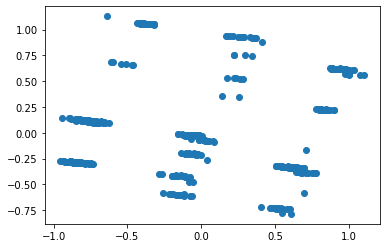

In [29]:
import matplotlib.pyplot as plt
plt.scatter(covid_pca[:,0], covid_pca[:,1])

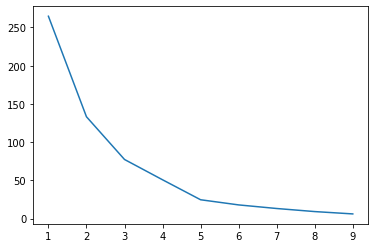

In [30]:
from sklearn.cluster import KMeans
errors = []
ks = []
for k in range(1,10):
  km = KMeans(n_clusters=k)
  pred = km.fit_predict(covid_pca)
  error = km.inertia_
  ks.append(k)
  errors.append(error)

plt.plot(ks, errors)

In [31]:
km = KMeans(n_clusters=4)
pred = km.fit_predict(covid_pca)
covid_pca_df = pd.DataFrame(covid_pca)

In [32]:
covid_pca_df['pred'] = pred
covid_pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       437 non-null    float64
 1   1       437 non-null    float64
 2   pred    437 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 8.7 KB


In [33]:
covid_pca_df['pred'].value_counts()

0    206
1    125
2     53
3     53
Name: pred, dtype: int64

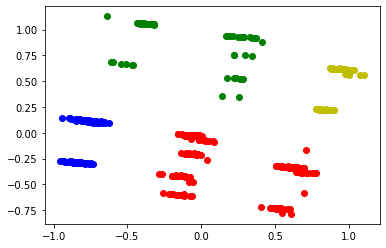

In [34]:
temp1 = covid_pca_df[covid_pca_df['pred'] == 0]
temp2 = covid_pca_df[covid_pca_df['pred'] == 1]
temp3 = covid_pca_df[covid_pca_df['pred'] == 2]
temp4 = covid_pca_df[covid_pca_df['pred'] == 3]
plt.scatter(temp1[0], temp1[1], color = 'r')
plt.scatter(temp2[0], temp2[1], color = 'b')
plt.scatter(temp3[0], temp3[1], color = 'g')
plt.scatter(temp4[0], temp4[1], color = 'y')
plt.show()

In [35]:
#Fitting the model
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 4)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [36]:
#check accuracy of our model on the test data
accuracy = knn.score(X_test, y_test)
print("Accuracy of KNN is: {}" .format(accuracy))

Accuracy of KNN is: 0.8611111111111112
